# Data

In [1]:
with open("data/shakespeare.txt", mode="r", encoding="utf-8") as f:
    text = f.read()

In [2]:
print(text[:500])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor


In [3]:
print(f"# chars: {len(text)}")

# chars: 1115394


In [4]:
vocab = sorted(list(set(text)))

vocab_size = len(vocab)
print(f"Vocab size: {vocab_size}")

"".join(vocab)

Vocab size: 65


"\n !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

In [5]:
char_to_int = {c: i for (i, c) in enumerate(vocab)}
int_to_char = {i: c for (i, c) in enumerate(vocab)}

encode = lambda chars: [char_to_int[c] for c in chars]
decode = lambda ints: "".join([int_to_char[i] for i in ints])

test_text = "hello world"
encoded_text = encode(test_text)
print(encoded_text)
print(decode(encoded_text))

[46, 43, 50, 50, 53, 1, 61, 53, 56, 50, 42]
hello world


In [6]:
import torch

data = torch.tensor(encode(text), dtype=torch.int64)
print(data.shape)

data[:500]

torch.Size([1115394])


tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
        47, 59, 57,  1, 47, 57,  1, 41, 

In [7]:
val_split = 0.1
n_val_samples = int(len(data) * val_split)

val_data = data[:n_val_samples]
train_data = data[n_val_samples:]

val_data.shape, train_data.shape

(torch.Size([111539]), torch.Size([1003855]))

In [8]:
block_size = 8
train_data[:block_size + 1]

tensor([43, 58,  6,  1, 25, 39, 56, 41, 47])

In [9]:
x = train_data[:block_size]
y = train_data[1:block_size + 1]

print(x, y)

for i in range(block_size):
    print(f"{x[:i+1], y[i]}")

tensor([43, 58,  6,  1, 25, 39, 56, 41]) tensor([58,  6,  1, 25, 39, 56, 41, 47])
(tensor([43]), tensor(58))
(tensor([43, 58]), tensor(6))
(tensor([43, 58,  6]), tensor(1))
(tensor([43, 58,  6,  1]), tensor(25))
(tensor([43, 58,  6,  1, 25]), tensor(39))
(tensor([43, 58,  6,  1, 25, 39]), tensor(56))
(tensor([43, 58,  6,  1, 25, 39, 56]), tensor(41))
(tensor([43, 58,  6,  1, 25, 39, 56, 41]), tensor(47))


In [10]:
batch_size = 4

def get_batch(data):
    inds = torch.randint(len(data) - block_size - 1, size=(batch_size,))
    x = torch.stack([data[i:i+block_size] for i in inds])
    y = torch.stack([data[i+1:i+block_size+1] for i in inds])
    return x, y

x, y = get_batch(train_data)

print(x.shape)
print(x)

print(y.shape)
print(y)

torch.Size([4, 8])
tensor([[ 8,  0,  0, 30, 27, 25, 17, 27],
        [43,  1, 52, 53, 58,  1, 46, 53],
        [57, 59, 52, 42, 43, 56,  8,  0],
        [ 6,  1, 58, 46, 43,  1, 50, 47]])
torch.Size([4, 8])
tensor([[ 0,  0, 30, 27, 25, 17, 27, 10],
        [ 1, 52, 53, 58,  1, 46, 53, 61],
        [59, 52, 42, 43, 56,  8,  0, 13],
        [ 1, 58, 46, 43,  1, 50, 47, 44]])


# Bigram model

In [11]:
import torch.nn as nn
from torch.nn import functional as F

class BigramModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding = nn.Embedding(vocab_size, vocab_size)
        
    def forward(self, inputs, targets=None):
        # inputs and targets are (B, T).
        logits = self.token_embedding(inputs)  # (B, T, C).
        
        loss = None
        
        # Calc cross-entropy loss.
        if targets != None:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)

            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)
        
        return logits, loss
    
    def generate(self, tokens, n_tokens):
        for i in range(n_tokens):
            logits, _ = self(tokens)  # (B, T, C)
            logits = logits[:, -1, :]  # only use last pred col. (B, C)
            
            probs = F.softmax(logits, dim=-1)
            next_tokens = torch.multinomial(probs, num_samples=1)
            
            tokens = torch.cat((tokens, next_tokens), dim=-1)  # append. (B, T+1)
        
        return tokens

In [12]:
bigram_model = BigramModel(vocab_size)
logits, loss = bigram_model(x, y)
logits.shape, loss.shape

(torch.Size([32, 65]), torch.Size([]))

In [13]:
import math

print(loss)
print(math.log(65))  # -ln(e^x/sum(e^x)) -> -ln(1/65) -> ln(65)

tensor(4.7085, grad_fn=<NllLossBackward0>)
4.174387269895637


In [14]:
starting_tokens = torch.tensor([[0]], dtype=torch.int64)
tokens = bigram_model.generate(starting_tokens, n_tokens=100)[0]

print(decode(tokens.tolist()))


pJ.JRjB!kU$'g,heesNLGUp:X,W cM?My?Yr.sSuFc?ma cCzZxUS-'FBnXcxUgvsK$&u;xw$tobJQXap?LG
;asSSlf.oZY!H K


In [15]:
optimizer = torch.optim.Adam(bigram_model.parameters(), lr=1e-3)

batch_size = 32

losses = []
for steps in range(10_000):
    xb, yb = get_batch(train_data)
    
    logits, loss = bigram_model(xb, targets=yb)
    losses.append(loss.item())
    
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()
    
print(losses[-1])

2.3665876388549805


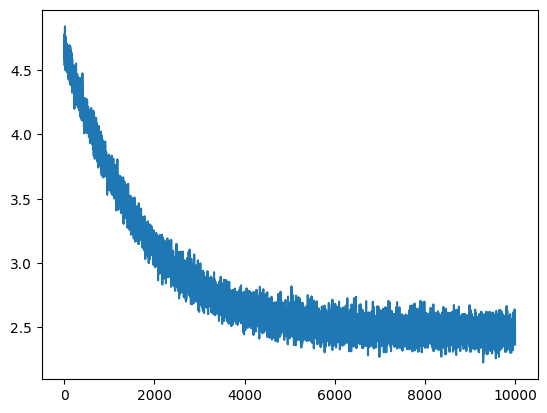

In [16]:
import matplotlib.pyplot as plt

plt.plot(losses)

In [17]:
starting_tokens = torch.tensor([[0]], dtype=torch.int64)
tokens = bigram_model.generate(starting_tokens, n_tokens=500)[0]

print(decode(tokens.tolist()))


STQUCADO thauo boutlingncord t cehityoiang nchar han are aveshiot in,
Catho IO:
UChin OUCHEELEO:
TEO, pha ds asos nkens wn oman Hino, m f m Imen
WALYor'thunougin l be apit ofowei-pert,
ICERKly mathalt t, cod

the ou.
Sid IOLINESithr.
MES:
Aug-rdas ticothe! t my se wenooousind?fome owiter? shat slas bre,
AROUCHalimu t st, hatourascyo feat,
Yottl br sst f, indgsur Be, gent ore.

OMy ithais Ma hfive bun!
What g y, n wourd atadovigrell t nthais oupumatee sin cofanoro air mens d st, oul pp
Hotho se t


# Attention (math trick)

In [18]:
B, T, C = 4, 8, 2

x = torch.randn(B, T, C)
x.shape

torch.Size([4, 8, 2])

In [19]:
x_bow = torch.zeros((B, T, C))
for b in range(B):
    for t in range(T):
        x_prev = x[b, :t+1]
        x_bow[b, t] = torch.mean(x_prev, 0)  # average all previous values together (channels separate).

In [20]:
x[0], x_bow[0]

(tensor([[ 0.6210,  0.5677],
         [ 0.7745, -1.8111],
         [-1.0264, -1.4724],
         [ 0.5736,  1.0270],
         [ 0.2668, -0.2377],
         [-0.5155, -0.8329],
         [-0.0247, -0.0921],
         [-0.7524, -1.6332]]),
 tensor([[ 0.6210,  0.5677],
         [ 0.6977, -0.6217],
         [ 0.1230, -0.9053],
         [ 0.2357, -0.4222],
         [ 0.2419, -0.3853],
         [ 0.1157, -0.4599],
         [ 0.0956, -0.4073],
         [-0.0104, -0.5606]]))

In [21]:
a = torch.tril(torch.ones(3, 3, dtype=torch.float32))
a = a / a.sum(dim=-1, keepdim=True)

b = torch.randint(0, 10, size=(3, 2), dtype=torch.float32)
c = a @ b

a, b, c

(tensor([[1.0000, 0.0000, 0.0000],
         [0.5000, 0.5000, 0.0000],
         [0.3333, 0.3333, 0.3333]]),
 tensor([[2., 8.],
         [6., 2.],
         [5., 7.]]),
 tensor([[2.0000, 8.0000],
         [4.0000, 5.0000],
         [4.3333, 5.6667]]))

In [22]:
x.shape

torch.Size([4, 8, 2])

In [23]:
wei = torch.tril(torch.ones((T, T), dtype=torch.float32))
wei = wei / wei.sum(dim=-1, keepdim=True)
wei

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

In [24]:
x_bow2 = wei @ x  # (B, T, T) @ (B, T, C) -> (B, T, C)
x_bow2

tensor([[[ 0.6210,  0.5677],
         [ 0.6977, -0.6217],
         [ 0.1230, -0.9053],
         [ 0.2357, -0.4222],
         [ 0.2419, -0.3853],
         [ 0.1157, -0.4599],
         [ 0.0956, -0.4073],
         [-0.0104, -0.5606]],

        [[ 1.0489, -1.1777],
         [-0.4277, -0.0355],
         [-0.3993, -0.3111],
         [ 0.3999, -0.2899],
         [ 0.4103, -0.4236],
         [ 0.4544, -0.2640],
         [ 0.2792, -0.3354],
         [ 0.2141, -0.2284]],

        [[-0.4884, -0.0186],
         [ 0.0435,  0.9072],
         [-0.1268,  0.5043],
         [ 0.1512,  0.3061],
         [-0.0067,  0.4055],
         [ 0.2603,  0.3719],
         [ 0.3240,  0.1141],
         [ 0.2463,  0.5517]],

        [[ 0.7365, -1.7025],
         [ 0.4031, -1.9213],
         [ 0.4448, -1.4212],
         [ 0.2707, -0.8812],
         [ 0.2726, -0.7041],
         [ 0.2184, -0.1914],
         [ 0.5490, -0.1152],
         [ 0.2076, -0.1703]]])

In [25]:
x_bow.allclose(x_bow2)

True

In [26]:
tril = torch.tril(torch.ones((T, T), dtype=torch.float32))

wei = torch.zeros((T, T))
wei = wei.masked_fill(tril == 0, float("-inf"))

wei

tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [27]:
wei = F.softmax(wei, dim=-1)
wei

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

In [28]:
x_bow3 = wei @ x
torch.allclose(x_bow, x_bow3)

True

# Attention

In [29]:
B, T, C = 4, 8, 32

token_embeddings = torch.randn(B, T, C)
token_embeddings.shape

torch.Size([4, 8, 32])

In [30]:
head_size = 16
key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)

k = key(token_embeddings)  # B, T, head_size
q = query(token_embeddings)
v = value(token_embeddings)

k.shape, q.shape, v.shape

(torch.Size([4, 8, 16]), torch.Size([4, 8, 16]), torch.Size([4, 8, 16]))

In [31]:
wei = q @ k.transpose(-2, -1)  # (B, T, head_size) @ (B, head_size, T) -> (B, T, T)
# Affinities between each key and each query!.
wei.shape

torch.Size([4, 8, 8])

In [32]:
# Scale wei.
wei = wei * (head_size ** -0.5)

In [33]:
tril = torch.tril(torch.ones(T, T, dtype=torch.int64))
wei = wei.masked_fill(tril == 0, float("-inf"))
wei = F.softmax(wei, dim=-1)
wei.shape

torch.Size([4, 8, 8])

In [34]:
wei[0]  # affinities between each key and query, with no future-peeking and smoothed.

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3848, 0.6152, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4238, 0.2336, 0.3427, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1631, 0.2891, 0.2606, 0.2872, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2193, 0.2019, 0.1580, 0.2025, 0.2184, 0.0000, 0.0000, 0.0000],
        [0.1593, 0.1654, 0.1375, 0.2061, 0.1871, 0.1447, 0.0000, 0.0000],
        [0.1523, 0.1716, 0.1133, 0.1386, 0.1357, 0.1500, 0.1385, 0.0000],
        [0.2257, 0.1841, 0.1051, 0.1305, 0.1036, 0.0771, 0.1076, 0.0663]],
       grad_fn=<SelectBackward0>)

In [35]:
v[0, :, :2]

tensor([[-0.0070,  0.0284],
        [-0.6836,  0.0982],
        [ 0.6463, -0.7275],
        [-0.4143, -1.0712],
        [ 0.3315,  0.2363],
        [-0.7337, -0.6708],
        [-0.0529, -0.1023],
        [-0.6319, -0.2702]], grad_fn=<SliceBackward0>)

In [36]:
out = wei @ v  # weighted mean (by k-q affinities) of values. 
out.shape  # (B, T, head_size)

torch.Size([4, 8, 16])

# Layer Norm

In [37]:
x = torch.randn((32, 100))
x.shape

torch.Size([32, 100])

In [38]:
y = torch.nn.LayerNorm(100)(x)
y.shape

torch.Size([32, 100])

In [39]:
y[:,0].mean(), y[:,0].std()

(tensor(-0.0347, grad_fn=<MeanBackward0>),
 tensor(1.2700, grad_fn=<StdBackward0>))

In [40]:
y[0, :].mean(), y[0, :].std()

(tensor(4.7684e-09, grad_fn=<MeanBackward0>),
 tensor(1.0050, grad_fn=<StdBackward0>))

# Muti-Head Attention

In [57]:
a = torch.arange(2 * 3 * 4).view(2, 3, 4)
a

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [62]:
b = a.view(2, 3, 2, 2).transpose(1, 2)
b

tensor([[[[ 0,  1],
          [ 4,  5],
          [ 8,  9]],

         [[ 2,  3],
          [ 6,  7],
          [10, 11]]],


        [[[12, 13],
          [16, 17],
          [20, 21]],

         [[14, 15],
          [18, 19],
          [22, 23]]]])

In [64]:
b.transpose(1, 2).view(2, 3, 4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])